In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
os.getcwd()

'C:\\Users\\Mickey Vogt\\Documents\\adams-docs\\adams-projects\\COVID-19\\ajvogt-analysis'

In [3]:
path = '../csse_covid_19_data/csse_covid_19_time_series/'
print(os.listdir(path))
df = pd.read_csv(path+'time_series_covid19_confirmed_US.csv')
print(df.shape)
print(df.head())

['.gitignore', 'Errata.csv', 'README.md', 'time_series_covid19_confirmed_global.csv', 'time_series_covid19_confirmed_US.csv', 'time_series_covid19_deaths_global.csv', 'time_series_covid19_deaths_US.csv', 'time_series_covid19_recovered_global.csv']
(3261, 133)
   UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   
4  850   VI  VIR    850  78.0    NaN            Virgin Islands             US   

       Lat     Long_  ... 5/13/20  5/14/20  5/15/20  5/16/20  5/17/20  \
0 -14.2710 -170.1320  ...       0        0        0        0        0   
1  13.4443  144.7937  ...     152      152      154      154      154   
2  15.0979  145.6739  ...      19 

In [4]:
df[df.Province_State == 'Missouri'].Admin2.unique()

array(['Adair', 'Andrew', 'Atchison', 'Audrain', 'Barry', 'Barton',
       'Bates', 'Benton', 'Bollinger', 'Boone', 'Buchanan', 'Butler',
       'Caldwell', 'Callaway', 'Camden', 'Cape Girardeau', 'Carroll',
       'Carter', 'Cass', 'Cedar', 'Chariton', 'Christian', 'Clark',
       'Clay', 'Clinton', 'Cole', 'Cooper', 'Crawford', 'Dade', 'Dallas',
       'Daviess', 'DeKalb', 'Dent', 'Douglas', 'Dunklin', 'Franklin',
       'Gasconade', 'Gentry', 'Greene', 'Grundy', 'Harrison', 'Henry',
       'Hickory', 'Holt', 'Howard', 'Howell', 'Iron', 'Jackson', 'Jasper',
       'Jefferson', 'Johnson', 'Knox', 'Laclede', 'Lafayette', 'Lawrence',
       'Lewis', 'Lincoln', 'Linn', 'Livingston', 'McDonald', 'Macon',
       'Madison', 'Maries', 'Marion', 'Mercer', 'Miller', 'Mississippi',
       'Moniteau', 'Monroe', 'Montgomery', 'Morgan', 'New Madrid',
       'Newton', 'Nodaway', 'Oregon', 'Osage', 'Ozark', 'Pemiscot',
       'Perry', 'Pettis', 'Phelps', 'Pike', 'Platte', 'Polk', 'Pulaski',
       '

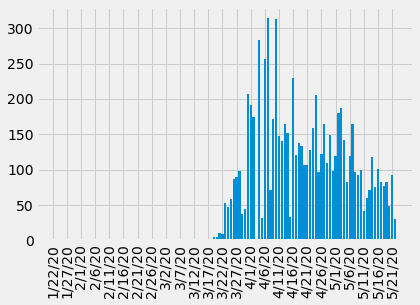

In [5]:
counties = ['St. Louis', 'St. Louis City', 'St. Charles', 'Franklin', 'Jefferson']
cond = (df.Province_State == 'Missouri')&\
       (df.Admin2.isin(counties))
df[cond].iloc[:, 11:]
xlabels = df.iloc[:, 11:].columns
xticks = np.arange(0, xlabels.shape[0], 1)
y = df[cond].iloc[:, 11:].sum(axis=0).diff()
plt.bar(xticks, y)
steps = np.arange(0, xticks.shape[0], 5)
plt.xticks(xticks[steps], xlabels[steps], rotation=90)
plt.show()


In [6]:
df[cond].iloc[:]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
1523,84029071,US,USA,840,29071.0,Franklin,Missouri,US,38.411271,-91.075228,...,133,134,134,134,134,135,135,136,137,137
1537,84029099,US,USA,840,29099.0,Jefferson,Missouri,US,38.259268,-90.538709,...,314,316,318,326,328,330,331,331,333,334
1579,84029183,US,USA,840,29183.0,St. Charles,Missouri,US,38.778757,-90.666624,...,680,688,688,688,695,704,712,712,712,722
1583,84029189,US,USA,840,29189.0,St. Louis,Missouri,US,38.637700,-90.445837,...,4022,4104,4172,4236,4287,4324,4374,4410,4472,4472
1602,84029510,US,USA,840,29510.0,St. Louis City,Missouri,US,38.635557,-90.243492,...,1571,1596,1602,1631,1654,1682,1705,1717,1744,1763
